In [87]:
import yfinance as yf

In [88]:
# downnloads price history for a single symbol
sp500 = yf.Ticker("^GSPC")

In [89]:
sp500 = sp500.history(period="max") #fetches the price history from the available data from the very beginning

In [90]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,0.0,0.0
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,0.0,0.0
2023-06-08 00:00:00-04:00,4268.689941,4298.009766,4261.069824,4293.930176,3826740000,0.0,0.0


In [91]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-05-30 00:00:00-04:00', '2023-05-31 00:00:00-04:00',
               '2023-06-01 00:00:00-04:00', '2023-06-02 00:00:00-04:00',
               '2023-06-05 00:00:00-04:00', '2023-06-06 00:00:00-04:00',
               '2023-06-07 00:00:00-04:00', '2023-06-08 00:00:00-04:00',
               '2023-06-09 00:00:00-04:00', '2023-06-12 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23976, freq=None)

<Axes: xlabel='Date'>

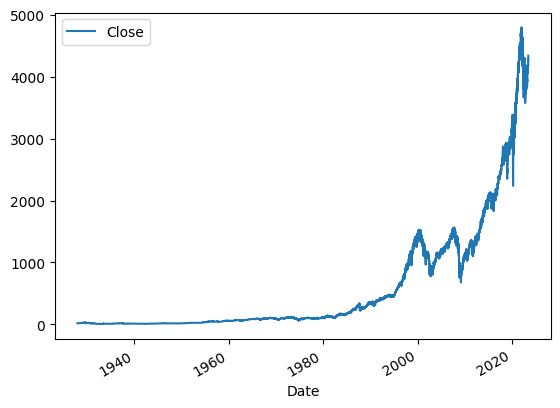

In [92]:
sp500.plot.line(y="Close", use_index = True) #plots a index against closing prices

In [93]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [94]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) #shifted all the closing prices  back one day and made it the "tomorrow" column

In [95]:
sp500["Target"] = (sp500["Tomorrow"]>sp500["Close"]).astype(int) #creates a target column for our ml code

In [96]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020,0
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,4293.930176,1
2023-06-08 00:00:00-04:00,4268.689941,4298.009766,4261.069824,4293.930176,3826740000,4298.859863,1


In [97]:
# A lot of historical data is great, but with stock market data, if you go back too far, the market may have shifted fundamentally and some of the old data may not be useful in making predictions
#Removing all data that came before 1990
sp500 = sp500.loc["1990-01-01":].copy()

In [98]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020,0
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,4293.930176,1
2023-06-08 00:00:00-04:00,4268.689941,4298.009766,4261.069824,4293.930176,3826740000,4298.859863,1


In [99]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [100]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [101]:
preds


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [103]:
preds

Date
2023-01-19 00:00:00-05:00    0
2023-01-20 00:00:00-05:00    0
2023-01-23 00:00:00-05:00    0
2023-01-24 00:00:00-05:00    0
2023-01-25 00:00:00-05:00    0
                            ..
2023-06-06 00:00:00-04:00    1
2023-06-07 00:00:00-04:00    1
2023-06-08 00:00:00-04:00    1
2023-06-09 00:00:00-04:00    1
2023-06-12 00:00:00-04:00    1
Length: 100, dtype: int64

In [104]:
precision_score(test["Target"], preds)

0.5806451612903226

In [105]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

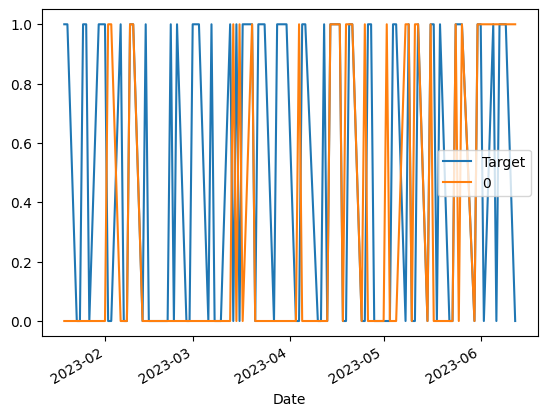

In [106]:
combined.plot()

In [107]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined



In [108]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [109]:
predictions = backtest(sp500, model, predictors)

In [110]:
predictions["Predictions"].value_counts()

0    3431
1    2495
Name: Predictions, dtype: int64

In [111]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5290581162324649

In [112]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533918
0    0.466082
Name: Target, dtype: float64

In [113]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [114]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020,0,1.001176,1.0,1.008398,3.0,1.044517,33.0,1.078279,115.0,1.137109,534.0
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,4293.930176,1,0.998090,1.0,1.000424,3.0,1.038797,33.0,1.074004,115.0,1.132369,533.0
2023-06-08 00:00:00-04:00,4268.689941,4298.009766,4261.069824,4293.930176,3826740000,4298.859863,1,1.003085,1.0,1.003186,3.0,1.043639,33.0,1.080351,116.0,1.138963,533.0


In [115]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [116]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020,0,1.001176,1.0,1.008398,3.0,1.044517,33.0,1.078279,115.0,1.137109,534.0
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,4293.930176,1,0.998090,1.0,1.000424,3.0,1.038797,33.0,1.074004,115.0,1.132369,533.0
2023-06-08 00:00:00-04:00,4268.689941,4298.009766,4261.069824,4293.930176,3826740000,4298.859863,1,1.003085,1.0,1.003186,3.0,1.043639,33.0,1.080351,116.0,1.138963,533.0


In [117]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [118]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined



In [119]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020,0,1.001176,1.0,1.008398,3.0,1.044517,33.0,1.078279,115.0,1.137109,534.0
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,4293.930176,1,0.998090,1.0,1.000424,3.0,1.038797,33.0,1.074004,115.0,1.132369,533.0
2023-06-08 00:00:00-04:00,4268.689941,4298.009766,4261.069824,4293.930176,3826740000,4298.859863,1,1.003085,1.0,1.003186,3.0,1.043639,33.0,1.080351,116.0,1.138963,533.0


In [120]:

# Make predictions using the backtest function
predictions = backtest(sp500, model, new_predictors)


In [121]:
predictions["Predictions"].value_counts()

0.0    4112
1.0     814
Name: Predictions, dtype: int64

In [130]:

precision_score(predictions["Target"], predictions["Predictions"])

0.5687960687960688